In [1]:
from data_loader import WireDataset
import torch
import math
import numpy as np
from torch.utils.data import DataLoader
from ML import Net
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchmetrics.classification import F1Score, MulticlassRecall, MulticlassConfusionMatrix
import pandas as pd
import seaborn as sb


In [2]:
dataset = WireDataset("Input_Data_07_25.csv")
# TODO add to device

if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

In [3]:
generator = torch.Generator().manual_seed(4)

train_fraction = math.floor(len(dataset)*0.7)
test_fraction = len(dataset) - train_fraction

test_data_ind, train_data_ind = torch.utils.data.random_split(dataset, [test_fraction, train_fraction], generator = generator)

dl_train = DataLoader(train_data_ind, batch_size=20, shuffle=True) #todevice
dl_test = DataLoader(test_data_ind, batch_size=20, shuffle=True) #todevice

net = Net() #todevice
#optimizer = torch.optim.SGD(net.parameters(), lr=0.0001)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

num_epochs = 100

In [4]:
epochs_stats = np.zeros((3, 100))
F1= F1Score("multiclass", num_classes = 6)
f1_max = 0

In [5]:
for epoch in range(num_epochs):  # loop over the dataset multiple times
    epoch_loss = []
    running_loss = 0.0
    net.train()
    for i, data in enumerate(dl_train, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        epoch_loss.append(loss.item())
        if i % 10 == 9:    # print every 10 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 10:.3f}')
            running_loss = 0.0
    
    predictions_list = [] #list for predictions (predicted number of label)
    values_list = []      #list for values (actual number of label)
    f1_list = np.zeros(len(dl_test))
    net.eval()
    running_loss = 0.0
    for i, data in enumerate(dl_test, 0):
        inputs, labels = data
        # forward + backward + optimize
        outputs = net(inputs)
        f1_list[i] = F1(outputs, labels).item()
        if i % 10 == 9:    # print every 10 mini-batches
            print(f"[batch {i}, size: {dl_test.batch_size}] F1 score: {f1_list[i]}")
    
    epoch_loss = np.array(epoch_loss, dtype="float")
    epochs_stats[0][epoch] = f1_list.mean()
    epochs_stats[1][epoch] = f1_list.std()
    epochs_stats[2][epoch] = epoch_loss.mean()
    
    if epochs_stats[0][epoch] > f1_max:
        torch.save(net.state_dict(), "model.ebr")
        f1_max=epochs_stats[0][epoch]

[1,    10] loss: 1.778
[1,    20] loss: 1.740
[1,    30] loss: 1.678
[1,    40] loss: 1.602
[1,    50] loss: 1.506
[1,    60] loss: 1.275
[1,    70] loss: 1.387
[1,    80] loss: 1.190
[1,    90] loss: 1.189
[1,   100] loss: 1.246
[1,   110] loss: 1.290
[1,   120] loss: 1.356
[batch 9, size: 20] F1 score: 0.6000000238418579
[batch 19, size: 20] F1 score: 0.6499999761581421
[batch 29, size: 20] F1 score: 0.6000000238418579
[batch 39, size: 20] F1 score: 0.6499999761581421
[batch 49, size: 20] F1 score: 0.6000000238418579


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

[2,    10] loss: 1.319
[2,    20] loss: 1.214
[2,    30] loss: 1.264
[2,    40] loss: 1.147
[2,    50] loss: 1.260
[2,    60] loss: 1.177
[2,    70] loss: 1.318
[2,    80] loss: 1.313
[2,    90] loss: 1.256
[2,   100] loss: 1.323
[2,   110] loss: 1.154
[2,   120] loss: 1.172
[batch 9, size: 20] F1 score: 0.44999998807907104
[batch 19, size: 20] F1 score: 0.75
[batch 29, size: 20] F1 score: 0.44999998807907104
[batch 39, size: 20] F1 score: 0.6000000238418579
[batch 49, size: 20] F1 score: 0.6000000238418579


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

[3,    10] loss: 1.216
[3,    20] loss: 1.273
[3,    30] loss: 1.186
[3,    40] loss: 1.176
[3,    50] loss: 1.147
[3,    60] loss: 1.263
[3,    70] loss: 1.291
[3,    80] loss: 1.093
[3,    90] loss: 1.084
[3,   100] loss: 1.262
[3,   110] loss: 1.127
[3,   120] loss: 1.189
[batch 9, size: 20] F1 score: 0.699999988079071
[batch 19, size: 20] F1 score: 0.3499999940395355
[batch 29, size: 20] F1 score: 0.44999998807907104
[batch 39, size: 20] F1 score: 0.5
[batch 49, size: 20] F1 score: 0.6499999761581421


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

[4,    10] loss: 1.088
[4,    20] loss: 1.103
[4,    30] loss: 1.037
[4,    40] loss: 1.105
[4,    50] loss: 0.962
[4,    60] loss: 1.163
[4,    70] loss: 1.190
[4,    80] loss: 1.059
[4,    90] loss: 1.037
[4,   100] loss: 1.001
[4,   110] loss: 1.133
[4,   120] loss: 0.974
[batch 9, size: 20] F1 score: 0.800000011920929
[batch 19, size: 20] F1 score: 0.75
[batch 29, size: 20] F1 score: 0.75
[batch 39, size: 20] F1 score: 0.550000011920929
[batch 49, size: 20] F1 score: 0.800000011920929


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

[5,    10] loss: 1.046
[5,    20] loss: 0.884
[5,    30] loss: 0.969
[5,    40] loss: 0.933
[5,    50] loss: 0.863
[5,    60] loss: 0.973
[5,    70] loss: 0.931
[5,    80] loss: 0.860
[5,    90] loss: 0.938
[5,   100] loss: 0.672
[5,   110] loss: 0.967
[5,   120] loss: 0.952
[batch 9, size: 20] F1 score: 0.8999999761581421
[batch 19, size: 20] F1 score: 0.8500000238418579
[batch 29, size: 20] F1 score: 0.8500000238418579
[batch 39, size: 20] F1 score: 0.75
[batch 49, size: 20] F1 score: 0.6499999761581421


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

[6,    10] loss: 0.822
[6,    20] loss: 0.854
[6,    30] loss: 0.948
[6,    40] loss: 0.798
[6,    50] loss: 0.869
[6,    60] loss: 0.795
[6,    70] loss: 0.896
[6,    80] loss: 0.916
[6,    90] loss: 0.680
[6,   100] loss: 0.844
[6,   110] loss: 0.841
[6,   120] loss: 0.934
[batch 9, size: 20] F1 score: 0.800000011920929
[batch 19, size: 20] F1 score: 0.800000011920929
[batch 29, size: 20] F1 score: 0.800000011920929
[batch 39, size: 20] F1 score: 0.699999988079071
[batch 49, size: 20] F1 score: 0.8999999761581421


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

[7,    10] loss: 0.774
[7,    20] loss: 0.822
[7,    30] loss: 0.913
[7,    40] loss: 0.750
[7,    50] loss: 0.777
[7,    60] loss: 0.745
[7,    70] loss: 0.771
[7,    80] loss: 0.752
[7,    90] loss: 0.721
[7,   100] loss: 0.798
[7,   110] loss: 0.778
[7,   120] loss: 0.761
[batch 9, size: 20] F1 score: 0.8500000238418579
[batch 19, size: 20] F1 score: 0.75
[batch 29, size: 20] F1 score: 0.8500000238418579
[batch 39, size: 20] F1 score: 0.699999988079071
[batch 49, size: 20] F1 score: 0.8500000238418579


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

[8,    10] loss: 0.695
[8,    20] loss: 0.685
[8,    30] loss: 0.739
[8,    40] loss: 0.739
[8,    50] loss: 0.747
[8,    60] loss: 0.739
[8,    70] loss: 0.664
[8,    80] loss: 0.731
[8,    90] loss: 0.722
[8,   100] loss: 0.740
[8,   110] loss: 0.687
[8,   120] loss: 0.620
[batch 9, size: 20] F1 score: 0.6499999761581421
[batch 19, size: 20] F1 score: 0.8500000238418579
[batch 29, size: 20] F1 score: 0.6499999761581421
[batch 39, size: 20] F1 score: 0.699999988079071
[batch 49, size: 20] F1 score: 0.6499999761581421


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

[9,    10] loss: 0.726
[9,    20] loss: 0.650
[9,    30] loss: 0.668
[9,    40] loss: 0.641
[9,    50] loss: 0.652
[9,    60] loss: 0.543
[9,    70] loss: 0.579
[9,    80] loss: 0.590
[9,    90] loss: 0.740
[9,   100] loss: 0.590
[9,   110] loss: 0.607
[9,   120] loss: 0.677
[batch 9, size: 20] F1 score: 0.800000011920929
[batch 19, size: 20] F1 score: 0.699999988079071
[batch 29, size: 20] F1 score: 0.6499999761581421
[batch 39, size: 20] F1 score: 0.949999988079071
[batch 49, size: 20] F1 score: 0.699999988079071


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

[10,    10] loss: 0.634
[10,    20] loss: 0.541
[10,    30] loss: 0.511
[10,    40] loss: 0.605
[10,    50] loss: 0.606
[10,    60] loss: 0.656
[10,    70] loss: 0.506
[10,    80] loss: 0.624
[10,    90] loss: 0.610
[10,   100] loss: 0.588
[10,   110] loss: 0.577
[10,   120] loss: 0.761
[batch 9, size: 20] F1 score: 0.75
[batch 19, size: 20] F1 score: 0.8500000238418579
[batch 29, size: 20] F1 score: 0.800000011920929
[batch 39, size: 20] F1 score: 0.800000011920929
[batch 49, size: 20] F1 score: 0.8500000238418579


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

[11,    10] loss: 0.497
[11,    20] loss: 0.543
[11,    30] loss: 0.595
[11,    40] loss: 0.517
[11,    50] loss: 0.717
[11,    60] loss: 0.506
[11,    70] loss: 0.606
[11,    80] loss: 0.585
[11,    90] loss: 0.513
[11,   100] loss: 0.562
[11,   110] loss: 0.474
[11,   120] loss: 0.526
[batch 9, size: 20] F1 score: 0.800000011920929
[batch 19, size: 20] F1 score: 0.800000011920929
[batch 29, size: 20] F1 score: 0.800000011920929
[batch 39, size: 20] F1 score: 0.800000011920929
[batch 49, size: 20] F1 score: 0.800000011920929


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

[12,    10] loss: 0.551
[12,    20] loss: 0.341
[12,    30] loss: 0.559
[12,    40] loss: 0.483
[12,    50] loss: 0.567
[12,    60] loss: 0.506
[12,    70] loss: 0.515
[12,    80] loss: 0.525
[12,    90] loss: 0.581
[12,   100] loss: 0.446
[12,   110] loss: 0.498
[12,   120] loss: 0.608
[batch 9, size: 20] F1 score: 0.8500000238418579
[batch 19, size: 20] F1 score: 0.800000011920929
[batch 29, size: 20] F1 score: 0.75
[batch 39, size: 20] F1 score: 0.8999999761581421
[batch 49, size: 20] F1 score: 0.8999999761581421
[13,    10] loss: 0.467
[13,    20] loss: 0.527
[13,    30] loss: 0.617
[13,    40] loss: 0.518
[13,    50] loss: 0.499
[13,    60] loss: 0.453
[13,    70] loss: 0.418
[13,    80] loss: 0.432
[13,    90] loss: 0.461
[13,   100] loss: 0.494
[13,   110] loss: 0.513
[13,   120] loss: 0.452
[batch 9, size: 20] F1 score: 0.75
[batch 19, size: 20] F1 score: 0.800000011920929
[batch 29, size: 20] F1 score: 0.8500000238418579
[batch 39, size: 20] F1 score: 0.949999988079071
[batch 

Finished Training


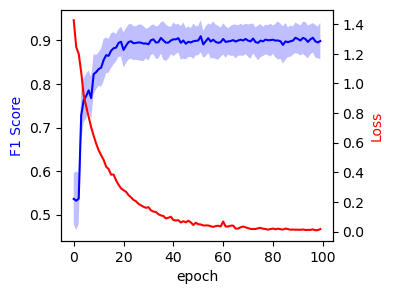

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
print('Finished Training')
#stats_column_names = ["F1", "F1 Standard Deviation", "Loss"]
#train_stats = pd.DataFrame(epochs_stats, index=stats_column_names)
#train_stats.to_csv("Train_statistics.csv", encoding="-utf8", index=False)
#ind = np.where(epochs_stats[0]==epochs_stats[0].max())
#print(f"Maximum F1: {epochs_stats[0].max()} standard deviation: {epochs_stats[1][ind]}, Minimum Loss: {epochs_stats[2].min()}")
df = pd.read_csv("Train_statistics.csv")
xs = []
for i in range(100):
    xs.append(i)
array = df.to_numpy()
t_student = 2.336242
mult_factor = t_student/math.sqrt(20)
err = []
for i in range(len(array[1])):
    err.append(array[1][i]*mult_factor)
fig, ax1 = plt.subplots(figsize=(3.5, 3))
ax1.set_xlabel("epoch")
ax1.set_ylabel("F1 Score", color = "blue")
ax1.plot(array[0], color="blue")
ax1.fill_between(x=xs, y1= (array[0]+err), y2=(array[0]-err), facecolor='blue',alpha=0.25,edgecolor='none')
ax2 = ax1.twinx()
ax2.set_ylabel("Loss", color = "red")
ax2.plot(array[2], color = "red")

plt.savefig("f1.pdf", bbox_inches="tight")

In [7]:

mcr = MulticlassRecall(num_classes=6, average=None)
mccm = MulticlassConfusionMatrix(num_classes=6)

net.eval()
out = None
lab = None
f1_list = np.zeros(len(dl_test))
running_loss = 0.0
for i, data in enumerate(dl_test, 0):
    inputs, labels = data
    # forward + backward + optimize
    outputs = net(inputs)


    if out is None:
        out = outputs.detach()
    else:
        out = np.vstack((out, outputs.detach()))

    if lab is None:
        lab = labels.detach()
    else:
        lab = np.hstack((lab, labels.detach()))
    f1_list[i] = F1(outputs, labels).item()
    if i % 10 == 9:    # print every 10 mini-batches
        print(f"[batch {i}, size: {dl_test.batch_size}] F1 score: {f1_list[i]}")

print(mcr(torch.Tensor(out), torch.Tensor(lab)))
print(mccm(torch.Tensor(out), torch.Tensor(lab)))

[batch 9, size: 20] F1 score: 0.8999999761581421
[batch 19, size: 20] F1 score: 1.0
[batch 29, size: 20] F1 score: 0.8999999761581421
[batch 39, size: 20] F1 score: 0.8999999761581421
[batch 49, size: 20] F1 score: 1.0
tensor([0.7955, 0.3548, 0.9628, 0.2500, 0.9358, 0.8050])
tensor([[ 35,   2,   4,   1,   1,   1],
        [  0,  11,  16,   1,   1,   2],
        [  0,   4, 569,   0,   3,  15],
        [  0,   1,   2,   4,   7,   2],
        [  0,   3,   7,   4, 248,   3],
        [  3,   4,  18,   3,   3, 128]])


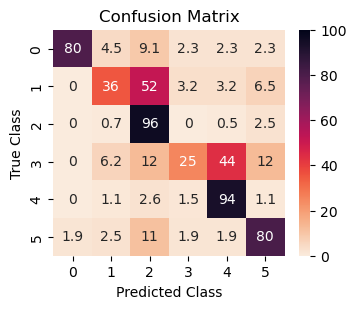

In [8]:
#import matplotlib.pyplot as plt
#import numpy as np
#import pandas as pd
#import seaborn as sb

class_full_names = ["Parassitic", "Wire Parallel Defect", "Wire Parallel Perfect", "Wire Tilted Defect", "Wire Tilted Perfect", "Null",]
class_names = ["0", "1", "2", "3", "4", "5"]

confusion_matrix = mccm(torch.Tensor(out), torch.Tensor(lab)).numpy()# np.array([[ 34,   2,   6,   0,   1,   1],
                            #[  0,  11,  17,   0,   1,   2],
                            #[  0,   5, 567,   1,   4,  14],
                            #[  0,   1,   2,   4,   7,   2],
                            #[  0,   1,   9,   2, 248,   5],
                            #[  1,   4,  18,   2,   5, 129]], dtype="float")
norm_vector = np.linalg.norm(confusion_matrix, ord=1, axis=1)
norm_vector = norm_vector.reshape(-1, 1)
perc_matrix = np.round((confusion_matrix * 100 / norm_vector), 1)
dataframe = pd.DataFrame(perc_matrix, index=class_names, columns=class_names)

plt.figure(figsize=(3.5, 3))
 
# Create heatmap
sb.heatmap(dataframe, annot=True, cmap="rocket_r", vmin = 0, vmax = 100)
plt.title("Confusion Matrix"), plt.tight_layout()
 
plt.ylabel("True Class"), 
plt.xlabel("Predicted Class")
plt.savefig("confusion_matrix.pdf", bbox_inches="tight")